In [1]:
import torch
import torchvision

from torchvision import models
import transformers
from transformers import PvtModel, AutoImageProcessor

from fir.datasets import deep_fashion_ctsrbm

import os
import pathlib

import numpy as np

from datasets import load_dataset

from tqdm.notebook import tqdm

---

In [37]:
model = PvtModel.from_pretrained("Zetatech/pvt-small-224")

In [38]:
with open("misc/pvt-small-224_model_arch.txt", "w") as out_file:
    print(model, file=out_file)

---

In [39]:
model = PvtModel.from_pretrained("Zetatech/pvt-small-224")

In [40]:
ctsrbm_image_transform = AutoImageProcessor.from_pretrained("Zetatech/pvt-small-224")
ctsrbm_image_transform_corr = lambda t: torch.from_numpy(ctsrbm_image_transform(t).pixel_values[0])

ctsrbm_dataset_dir = os.path.join(pathlib.Path.home(), "data", "DeepFashion", "Consumer-to-shop Clothes Retrieval Benchmark")
ctsrbm_dataset = deep_fashion_ctsrbm.ConsToShopClothRetrBmkImageLoader(ctsrbm_dataset_dir, ctsrbm_image_transform_corr)

In [41]:
ctsrbm_image_transform

PvtImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "PvtImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [42]:
input = ctsrbm_dataset[0]

img_tensor = input[0]
item_id = input[1]

In [43]:
print(img_tensor.shape)

torch.Size([3, 224, 224])


In [44]:
item_id

24444

In [45]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output
    return hook

model.encoder.block[0].register_forward_hook(get_activation('encoder.block[0]'))
model.encoder.block[1].register_forward_hook(get_activation('encoder.block[1]'))
model.encoder.block[2].register_forward_hook(get_activation('encoder.block[2]'))
model.encoder.block[3].register_forward_hook(get_activation('encoder.block[3]'))
model.encoder.layer_norm.register_forward_hook(get_activation('encoder.layer_norm'))
model.encoder.register_forward_hook(get_activation('encoder'))

In [46]:
input = ctsrbm_dataset[0][0][None, :]
output = model(input)

In [47]:
print("{:40s}".format("input"))
print("    {:}".format(type(input)))
print("    {:}".format(input.shape))

print()

print("{:40s}".format("output.last_hidden_state"))
print("    {:}".format(type(output.last_hidden_state)))
print("    {:}".format(output.last_hidden_state.shape))

print()
print("---")
print()

for key, item in activation.items():
    print("{:40s}".format(key))
    print("    {:}".format(type(item)))

    if type(item) is tuple:
        print("    Num items: {:d}".format(len(item)))
        for item_idx, item_el in enumerate(item):
            print("    Item {:d}:".format(item_idx))
            print("        {:}".format(type(item_el)))
            if type(item_el) is torch.Tensor:
                print("        {:}".format(item_el.shape))

    if type(item) is torch.Tensor:
        print("    {:}".format(item.shape))

    if type(item) is transformers.modeling_outputs.BaseModelOutput:
        print("    last_hidden_state:")
        print("        {:}".format(item.last_hidden_state.shape))

    print()

input                                   
    <class 'torch.Tensor'>
    torch.Size([1, 3, 224, 224])

output.last_hidden_state                
    <class 'torch.Tensor'>
    torch.Size([1, 50, 512])

---

encoder.layer_norm                      
    <class 'torch.Tensor'>
    torch.Size([1, 50, 512])

encoder                                 
    <class 'transformers.modeling_outputs.BaseModelOutput'>
    last_hidden_state:
        torch.Size([1, 50, 512])



---

In [2]:
model = PvtModel.from_pretrained("Zetatech/pvt-small-224")

In [3]:
ctsrbm_image_transform = AutoImageProcessor.from_pretrained("Zetatech/pvt-small-224")
ctsrbm_image_transform.size["height"] = 448
ctsrbm_image_transform.size["width"] = 448
ctsrbm_image_transform_corr = lambda t: torch.from_numpy(ctsrbm_image_transform(t).pixel_values[0])
ctsrbm_dataset_dir = os.path.join(pathlib.Path.home(), "data", "DeepFashion", "Consumer-to-shop Clothes Retrieval Benchmark")
ctsrbm_dataset = deep_fashion_ctsrbm.ConsToShopClothRetrBmkImageLoader(ctsrbm_dataset_dir, ctsrbm_image_transform_corr)

In [4]:
ctsrbm_image_transform

PvtImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "PvtImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 448,
    "width": 448
  }
}

In [5]:
input = ctsrbm_dataset[0]

img_tensor = input[0]
item_id = input[1]

In [6]:
print(img_tensor.shape)

torch.Size([3, 448, 448])


In [7]:
item_id

24444

In [8]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output
    return hook

model.encoder.block[0].register_forward_hook(get_activation('encoder.block[0]'))
model.encoder.block[1].register_forward_hook(get_activation('encoder.block[1]'))
model.encoder.block[2].register_forward_hook(get_activation('encoder.block[2]'))
model.encoder.block[3].register_forward_hook(get_activation('encoder.block[3]'))
model.encoder.layer_norm.register_forward_hook(get_activation('encoder.layer_norm'))
model.encoder.register_forward_hook(get_activation('encoder'))

In [9]:
input = ctsrbm_dataset[0][0][None, :]
output = model(input)

HOLA

batch_size: 1
num_channels: 3
height: 448
width: 448

height: 112
width: 112



RuntimeError: The size of tensor a (64) must match the size of tensor b (16) at non-singleton dimension 2

In [ ]:
print("{:40s}".format("input"))
print("    {:}".format(type(input)))
print("    {:}".format(input.shape))

print()

print("{:40s}".format("output.last_hidden_state"))
print("    {:}".format(type(output.last_hidden_state)))
print("    {:}".format(output.last_hidden_state.shape))

print()
print("---")
print()

for key, item in activation.items():
    print("{:40s}".format(key))
    print("    {:}".format(type(item)))

    if type(item) is tuple:
        print("    Num items: {:d}".format(len(item)))
        for item_idx, item_el in enumerate(item):
            print("    Item {:d}:".format(item_idx))
            print("        {:}".format(type(item_el)))
            if type(item_el) is torch.Tensor:
                print("        {:}".format(item_el.shape))

    if type(item) is torch.Tensor:
        print("    {:}".format(item.shape))

    if type(item) is transformers.modeling_outputs.BaseModelOutput:
        print("    last_hidden_state:")
        print("        {:}".format(item.last_hidden_state.shape))

    print()

input                                   
    <class 'torch.Tensor'>
    torch.Size([1, 3, 768, 768])

output.last_hidden_state                
    <class 'torch.Tensor'>
    torch.Size([1, 384, 48, 48])

---

encoder.stages[0]                       
    <class 'tuple'>
    Num items: 2
    Item 0:
        <class 'torch.Tensor'>
        torch.Size([1, 64, 192, 192])
    Item 1:
        <class 'NoneType'>

encoder.stages[1]                       
    <class 'tuple'>
    Num items: 2
    Item 0:
        <class 'torch.Tensor'>
        torch.Size([1, 192, 96, 96])
    Item 1:
        <class 'NoneType'>

encoder.stages[2].embedding             
    <class 'torch.Tensor'>
    torch.Size([1, 384, 48, 48])

encoder.stages[2]                       
    <class 'tuple'>
    Num items: 2
    Item 0:
        <class 'torch.Tensor'>
        torch.Size([1, 384, 48, 48])
    Item 1:
        <class 'torch.Tensor'>
        torch.Size([1, 1, 384])

encoder                                 
    <class 'trans

---

In [19]:
model = PvtModel.from_pretrained("Zetatech/pvt-small-224")

In [20]:
ctsrbm_image_transform = AutoImageProcessor.from_pretrained("Zetatech/pvt-small-224")
ctsrbm_image_transform.size["shortest_edge"] = 448
ctsrbm_image_transform_corr = lambda t: torch.from_numpy(ctsrbm_image_transform(t).pixel_values[0])
ctsrbm_dataset_dir = os.path.join(pathlib.Path.home(), "data", "DeepFashion", "Consumer-to-shop Clothes Retrieval Benchmark")
ctsrbm_dataset = deep_fashion_ctsrbm.ConsToShopClothRetrBmkImageLoader(ctsrbm_dataset_dir, ctsrbm_image_transform_corr)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [21]:
ctsrbm_image_transform

ConvNextImageProcessor {
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 768
  }
}

In [22]:
last_feature_l = 0
last_feature_hw = 0

for size in tqdm(range(3, 50 + 1)):

    input = ctsrbm_dataset[0][0][None, :, :size, :size]
    output = model(input)

    feature_l = output.last_hidden_state.size(1)
    feature_hw = output.last_hidden_state.size(3)

    if last_feature_l < feature_l or last_feature_hw < feature_hw:
        print("{:3d} {:3d} {:3d}".format(size, feature_l, feature_hw))
        last_feature_l = feature_l
        last_feature_hw = feature_hw

  0%|          | 0/766 [00:00<?, ?it/s]

In [23]:
for size in tqdm(range(3, 768 + 1)):

    input = ctsrbm_dataset[0][0][None, :, :size, :size]
    output = model(input)

    perm_size = output.last_hidden_state.size(3)
    
    theo_perm_size = ((size - 3) // 16) + 1

    if perm_size != theo_perm_size:
        print(size, perm_size, theo_perm_size)

  0%|          | 0/766 [00:00<?, ?it/s]

---

In [24]:
import fir.arch.backbones_trf

In [25]:
img_size = 384
model = fir.arch.backbones_trf.CvTransformerB21I384D22kBackbone(img_size)

In [26]:
model_image_transform = model.get_image_transform()
ctsrbm_dataset_dir = os.path.join(pathlib.Path.home(), "data", "DeepFashion", "Consumer-to-shop Clothes Retrieval Benchmark")
ctsrbm_dataset = deep_fashion_ctsrbm.ConsToShopClothRetrBmkImageLoader(ctsrbm_dataset_dir, model_image_transform)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [27]:
input = ctsrbm_dataset[0][0][None, :]
output = model(input)

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def show_data_ConsToShopClothRetrBmkImageLoader(idx):

    image, item_id = ctsrbm_dataset[idx]

    image_copy = image

    if type(image) == torch.Tensor:
        image_copy = image_copy.permute(1, 2, 0)

    vmax = image_copy.max().item()
    vmin = image_copy.min().item()

    image_copy = (image_copy - vmin) / (vmax - vmin)

    plt.imshow(image_copy)
    
    title_lines = []
    title_lines.append("Image ID: {:d}".format(idx))
    title_lines.append("Item ID: {:d}".format(item_id))
    title_lines.append("Size: " + str(image_copy.size()))
    plt.title("\n".join(title_lines))

    plt.show()

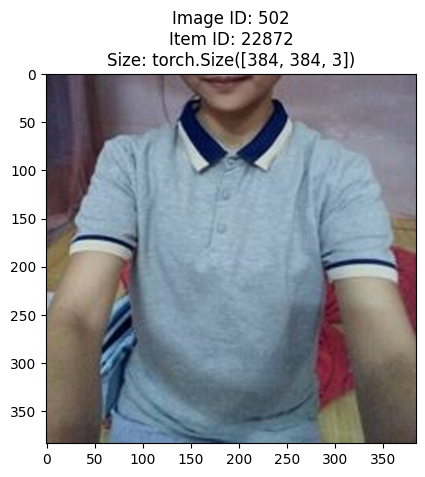

In [31]:
show_data_ConsToShopClothRetrBmkImageLoader(502)